In [1]:
import os
import cv2
import torch

# Directories
video_dir = "/home/hc4293/echoframe/data/echodynamic/Videos/"
save_dir = "/home/hc4293/echoframe/data/echodynamic/augmented_masks/"

# Function to get video properties
def get_video_properties(video_path):
    """
    Gets video properties such as frame count, width, and height.

    Args:
        video_path (str): Path to the video file.

    Returns:
        tuple: (total_frames, width, height)
    """
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise FileNotFoundError(f"Could not open video file: {video_path}")
    
    # Get video properties
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return total_frames, height, width

# List to store mismatched shapes
mismatched_shapes = []

# Counter for total videos processed
video_count = 0

# Loop through all videos in the video directory
for video_file in os.listdir(video_dir):
    if video_file.endswith(".avi"):  # Check for video files
        video_count += 1
        video_path = os.path.join(video_dir, video_file)
        tensor_path = os.path.join(save_dir, video_file.replace(".avi", ""))  # Remove .avi extension

        # Get original video properties
        try:
            original_shape = get_video_properties(video_path)
        except FileNotFoundError as e:
            print(e)
            continue

        # Check if corresponding tensor file exists
        if not os.path.exists(tensor_path):
            print(f"Tensor file not found for: {video_file}")
            continue

        # Load the tensor
        tensor = torch.load(tensor_path)
        generated_shape = (tensor.shape[0], tensor.shape[1], tensor.shape[2])

        # Compare shapes
        if original_shape != generated_shape:
            mismatched_shapes.append((video_file, original_shape, generated_shape))

        # Print status every 1000 videos
        if video_count % 1000 == 0:
            print(f"All good till now {video_count}")

# Print mismatched shapes
if mismatched_shapes:
    print("\nMismatched Shapes:")
    for video_name, original_shape, generated_shape in mismatched_shapes:
        print(f"Video: {video_name}")
        print(f"  Original Shape: {original_shape}")
        print(f"  Generated Tensor Shape: {generated_shape}")
else:
    print("\nAll shapes match!")

# Print total number of videos processed
print(f"\nTotal number of videos processed: {video_count}")


All good till now 1000
All good till now 2000
Tensor file not found for: 0X6A46321A41C98FC7.avi
All good till now 3000
All good till now 4000
All good till now 5000
All good till now 6000
All good till now 7000
Tensor file not found for: 0X2A55659AE64722AA.avi
All good till now 8000
All good till now 9000
Tensor file not found for: 0X174A9943AB689618.avi
All good till now 10000

All shapes match!

Total number of videos processed: 10030


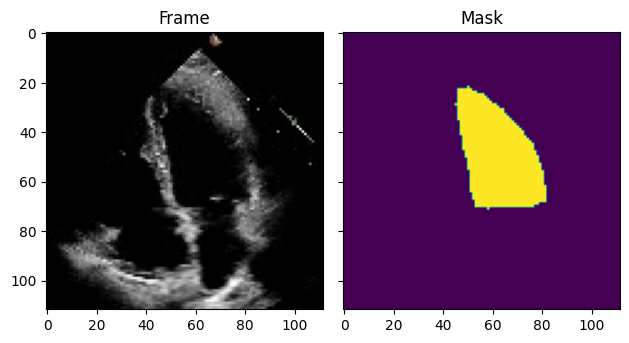

In [1]:
from dataloader import EchoMasks
dataset = EchoMasks(root="./data/echodynamic/", split='train', batch_size=1)


# Call the display_example method
dataset.display_example(idx=0)

In [ ]:
echo_train = EchoMasks(split = 'train' , noise = 0.005, padding=8, batch_size = 1)
echo_valid = EchoMasks(split ='val', padding = 8, batch_size = 1)
echo_test = EchoMasks(split ='test', padding = 8, batch_size = 1)

Number of training samples: 7460
Number of validation samples: 1288
Number of Test samples: 1276


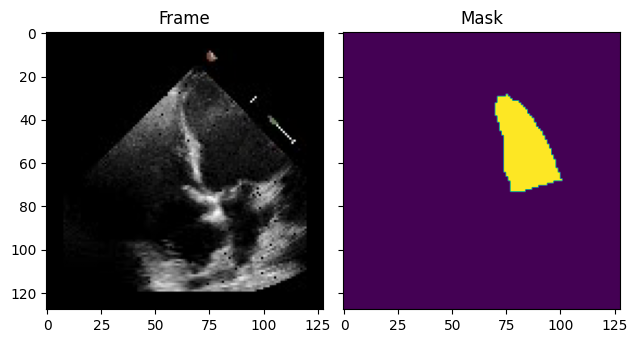

Iterating over training dataset:
Batch 1:
  Input shape: (2, 128, 128, 3)
  Output shape: (2, 128, 128, 1)
Batch 2:
  Input shape: (2, 128, 128, 3)
  Output shape: (2, 128, 128, 1)
Batch 3:
  Input shape: (2, 128, 128, 3)
  Output shape: (2, 128, 128, 1)
Iterating over validation dataset:
Batch 1:
  Input shape: (2, 128, 128, 3)
  Output shape: (2, 128, 128, 1)
Batch 2:
  Input shape: (2, 128, 128, 3)
  Output shape: (2, 128, 128, 1)
Batch 3:
  Input shape: (2, 128, 128, 3)
  Output shape: (2, 128, 128, 1)


In [ ]:
# Inspect the number of samples
print(f"Number of training samples: {len(echo_train)}")
print(f"Number of validation samples: {len(echo_valid)}")
print(f"Number of Test samples: {len(echo_test)}")

# Visualize one batch of training data
echo_train.display_example(idx=1)  # Display the first batch

# Iterate over the training dataset
print("Iterating over training dataset:")
for i in range(len(echo_train)):
    X, y = echo_train[i]
    print(f"Batch {i + 1}:")
    print(f"  Input shape: {X.shape}")
    print(f"  Output shape: {y.shape}")
    if i == 2:  # Display up to 3 batches for inspection
        break

# Iterate over the validation dataset
print("Iterating over validation dataset:")
for i in range(len(echo_valid)):
    X, y = echo_valid[i]
    print(f"Batch {i + 1}:")
    print(f"  Input shape: {X.shape}")
    print(f"  Output shape: {y.shape}")
    if i == 2:
        break


In [1]:
import torch
import matplotlib.pyplot as plt
from torchsummary import summary
from modelv1 import MobileNetV3UNet

# Test the entire architecture
def test_mobilenetv3_unet():
    # Check for GPU availability
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"Using device: {device}")

    # Initialize model and move to the appropriate device
    model = MobileNetV3UNet(config_name="large", inchannels=3, outchannels=1).to(device)
    
    # Print model summary
    print("\nModel Summary:")
    summary(model, input_size=(3, 224, 224), device=str(device))
    
    # Create dummy input and move to the same device
    input_tensor = torch.randn(1, 3, 224, 224).to(device)
    print(f"\nInput Shape: {input_tensor.shape}")

    # Forward pass
    print("\nPerforming forward pass...")
    output_tensor = model(input_tensor)
    print(f"Output Shape: {output_tensor.shape}")
    
    # Move tensors back to CPU for visualization
    input_tensor = input_tensor.cpu()
    output_tensor = output_tensor.cpu()
    visualize_input_output(input_tensor, output_tensor)

# Visualize input and output
def visualize_input_output(input_tensor, output_tensor):
    input_image = input_tensor[0].permute(1, 2, 0).detach().numpy()
    output_image = output_tensor[0, 0].detach().numpy()
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Input Image")
    plt.imshow(input_image)
    plt.axis("off")
    
    plt.subplot(1, 2, 2)
    plt.title("Output Image")
    plt.imshow(output_image, cmap='gray')
    plt.axis("off")
    
    plt.show()

# Execute the test
test_mobilenetv3_unet()


Using device: cuda

Model Summary:
Upsample: x.shape=torch.Size([2, 512, 7, 7]), skip_features.shape=torch.Size([2, 160, 7, 7])


RuntimeError: Given groups=1, weight of size [512, 1024, 3, 3], expected input[2, 672, 7, 7] to have 1024 channels, but got 672 channels instead